# BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding (2019)
출처: [https://arxiv.org/pdf/1810.04805.pdf](https://arxiv.org/pdf/1810.04805.pdf)

# Abstract
**B**idirectional **E**ncoder **R**epresentations from **T**ransformers를 상징하는 **BERT**라는 새로운 언어 표현 모델을 소개합니다. 최근의 언어 표현 모델과 달리 BERT는 모든 레이어의 왼쪽 및 오른쪽 컨텍스트를 공동으로 조건화하여 레이블이 지정되지 않은 텍스트에서 deep bidirectional 표현을 pre-train하도록 설계되었습니다. 결과적으로 사전 훈련된 BERT 모델은 실질적인 작업별 아키텍처 수정 없이 question answering 및 language inference와 같은 광범위한 작업을 위한 SOTA 모델을 생성을 하는데 단 하나의 추가 output 레이어로 fine-tuning할 수 있습니다.

BERT는 개념적으로 간단하고 경험적으로 powerful합니다. 11개의 자연어 처리 작업에 대한 새로운 SOTA 결과를 얻습니다.

# 1 Introduction
Downstream tasks에 pre-trained된 언어 표현을 적용하기 위한 두 가지 기존 전략이 있습니다. $feature-based$와 $fine-tuning$입니다. ELMo (Peters et al., 2018a)와 같은 feature-based 접근 방식은 사전 훈련된 표현을 추가 features로 포함하는 task-specific 아키텍처를 사용합니다. Generative Pre-trained Transformer (OpenAI GPT)(Radford et al., 2018)와 같은 fine tuning 접근 방식은 최소한의 task-specific parameters를 도입하고 모든 사전 훈련된 parameters를 fine-tuning하여 downstream tasks에 대해 학습합니다. 두 가지 접근 방식은 pre-training 동안 동일한 objective function을 공유하며, 단방향 언어 모델을 사용하여 일반적인 언어 표현을 학습합니다.

우리는 현재 이런 기술들 특히 fine-tuning 접근 방식에 대해 pre-trained된 언어 표현의 power을 제한한다고 주장합니다. 주요 제한 사항은 표준 언어 모델이 단방향이며 이는 pre-training 중에 사용할 수 있는 아키텍처 선택을 제한한다는 것입니다. 예를 들어, OpenAIGPT에서 저자는 모든 토큰이 Transformer의 self-attention 레이어에 있는 이전 토큰에만 관심을 가질 수 있는 left-to-right 아키텍처를 사용합니다 (Vaswani et al., 2017). 이러한 제한은 sentence-level 작업에 대해 최선책은 아니며, 양방향 컨텍스트를 통합하는 것이 중요한 question answering과 같은 token-level 작업에 fine-tuning 기반 접근 방식을 적용할 때 매우 좋지않을 수 있습니다.

본 논문에서는 **BERT**: **B**idirectional **E**ncoder **R**epresentations from **T**ransformers를 제안하여 fine-tuning 기반 접근 방식을 개선합니다. BERT는 Cloze task (Taylor, 1953)에서 영감을 받은 "masked language model" (MLM) (pre-training을 위한)을 사용하여 앞에서 언급한 단방향 모델의 제약을 완화합니다. masked language model은 input에서 일부 토큰을 무작위로 마스킹합니다. 이렇게 하는 목적은 컨텍스트 기반으로 마스킹된 단어의 원래 어휘 ID를 예측하는 것입니다. left-to-right 언어 모델 pre-training과 달리 MLM은 언어 표현이 왼쪽과 오른쪽 컨텍스트를 융합할 수 있도록 하여 deep bidirectional Transformer를 pre-training할 수 있도록 합니다. 또한, masked language model 외에도 text-pair representations를 공동으로 pre-training하는 "next sentence prediction" 작업도 사용합니다.

<br/>

따라서, 이 논문은 다음과 같은 사실을 보여줍니다:

- 언어 표현을 위한 bidirectional pre-training의 중요성


- pre-trained representations가 heavily-engineered task-specific 아키텍처의 필요성을 줄여주는 것


- BERT가 11개 NLP 작업에 대한 SOTA 달성

# 3 BERT
이 섹션에서는 BERT와 BERT의 자세한 구현을 소개합니다. framework에는 $pre-training$과 $fine-tuning$의 두 단계가 있습니다. pre-training 동안 모델은 다양한 pre-training tasks에서 레이블이 지정되지 않은 데이터로 훈련합니다. fine-tuning을 위해 BERT 모델은 먼저 pre-trained parameters로 초기화되고, 모든 parameters는 downstream tasks의 레이블이 지정된 데이터를 사용하여 fine-tuning됩니다. 각 downstream tasks에는 pre-trained된 동일한 parameters로 초기화된 경우에도 별도의 fine-tuned 모델이 있습니다. Figure 1의 question answering 예제는 이 섹션의 예제 역할을 합니다.

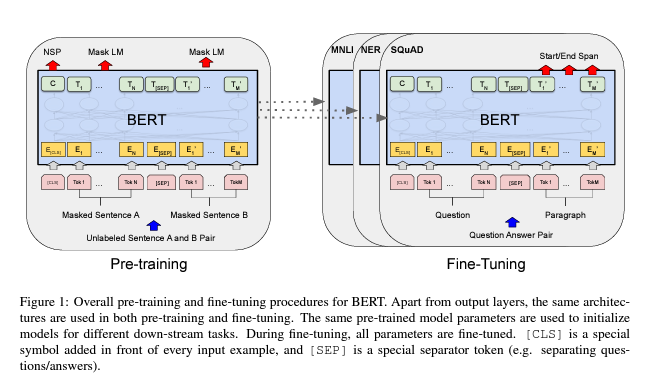

BERT의 독특한 특징은 다양한 작업에 걸친 통합 아키텍처입니다. pre-trained된 아키텍처와 최종 downstream 아키텍처 사이에는 약간의 차이만 있습니다.

**Model Architecture**

BERT의 모델 아키텍처는 Vaswani et al. (2017)에 설명된 기존의 구현을 기반으로 하는 multi-layer bidirectional Transformer입니다.

- number of layers: **L**
- hidden_size: **H**
- self-attention: **A**

여기서는 두개의 모델 사이즈를 결과로 보고합니다.

$$BERT_{BASE}\, (L=12,\, H=768,\, A=12,\, Total\, Parameters=110M)$$
<br/>
$$BERT_{LARGE}\, (L=24,\, H=1024,\, A=16,\, Total\, Parameters=340M)$$

<br/>
<br/>
<br/>
**Input/Output Representations**

BERT가 다양한 downstream tasks를 처리하도록 하기 위해 input은 하나의 토큰 시퀀스에서 단일 문장과 한 쌍의 문장(예: 질문, 답변)을 모두 명확하게 나타낼 수 있습니다. 이 task 전체에서 "문장"은 실제 언어 문장이 아니라 인접한 텍스트의 임의 범위가 될 수 있습니다. "시퀀스"는 BERT에 대한 input 토큰 시퀀스를 나타내며, 이는 단일 문장 또는 함께 packed된 두 문장일 수 있습니다.

우리는 30000개의 token vocabulary와 함께 WordPiece embeddings (Wu et al., 2016)를 사용합니다. 모든 시퀀스의 첫 번째 token은 항상 special classification token([CLS])입니다. 이 token에 해당하는 최종 hidden state는 분류 작업을 위해 aggregate 시퀀스 표현으로 사용됩니다. sentence pairs는 단일 시퀀스로 함께 packed됩니다. 여기서는 두 가지 방법으로 문장을 구별합니다. 먼저 special token([SEP])으로 구분합니다. 둘째, 문장 A에 속하는지 아니면 문장 B에 속하는지를 나타내는 모든 token에 학습한 임베딩을 추가합니다.

Figure 1에서 보는 것처럼, embedding은 $E$, [CLS] token의 마지막 hidden vector는 $C \in \mathbb{R}^{H}$, $i^{th}$ input token의 마지막 hidden vector는 $T_{i} \in \mathbb{R}^{H}$로 나타냅니다.

주어진 토큰에 대한 input 표현은 해당 token, segment 및 position embeddings를 합산하여 구성됩니다. 이 구조의 visualization는 Figure 2에서 볼 수 있습니다.

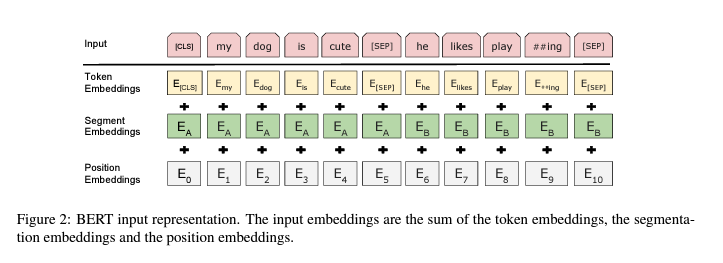

## 3.1 Pre-training BERT

### Task #1: Masked LM
bidirectional conditioning은 각 단어가 간접적으로 자기 자신을 볼 수 있도록 하며, 모델은 multi-layered 컨텍스트에서 target word를 약간 예측할 수 있게 합니다. 

따라서, 이 논문에서는 deep bidirectional 표현을 훈련하기 위해, input token의 일부를 무작위로 마스킹한 다음 마스킹된 token을 예측합니다. 여기서는 이러한 절차를 "masked LM"(MLM)이라고 하지만, 문헌에서는 종종 Cloze task라고 합니다 (Taylor, 1953). 이 경우 마스크 토큰에 해당하는 최종 hidden vector는 standard LM에서와 같이 어휘에 대한 output softmax에 제공됩니다. 모든 experiments에서는 무작위로 각 시퀀스의 모든 WordPiece 토큰의 15%를 마스킹합니다. denoising auto-encoders (Vincent et al., 2008)와 달리 여기서는 전체 input을 재구성하는 대신 마스킹된 단어만 예측합니다.

이를 통해 bidirectional pre-trained 모델을 얻을 수 있지만, fine-tuning 중에는 [MASK] token이 나타나지 않기 때문에 pre-training과 fine-tuning 간에 불일치가 발생한다는 단점이 있습니다. 이를 완화하기 위해 마스킹된 단어를 실제 [MASK] token으로 항상 교체하지는 않습니다. 훈련 데이터 generator는 예측을 위해 token의 15%를 무작위로 선택합니다. 

> i번째 token이 선택되면 i번째 마스킹 token을 (1) 80%는 [MASK] token, (2) 10%는 임의의 token, (3) 10%는 변경되지 않은 i번째 token


그런 다음 $T_i$는 cross entropy loss로 원래 token을 예측하는 데 사용됩니다.

### Task #2: Next Sentence Prediction (NSP)
각 pre-training 예제에 대해 문장 A와 B를 선택할 때, B의 50%는 A 다음에 오는 실제 다음 문장이고 (IsNext로 레이블 지정), 50%는 corpus에서 임의의 문장 (NotNext으로 레이블 지정)입니다. Figure 1에서 볼 수 있듯이 $C$는 next sentence prediction (NSP)에 사용됩니다. 이러한 단순함에도 불구하고 섹션 5.1에서 이 task에 대한 pre-training이 QA와 NLI 모두에 매우 유익하다는 것을 보여줍니다.

이전 task에서는 문장 임베딩만 downstream tasks로 전달되지만, 여기서 BERT는 end-task 모델 parameters를 초기화하기 위해 모든 parameters를 전달합니다.

# 4 Experiments

## 4.1 GLUE
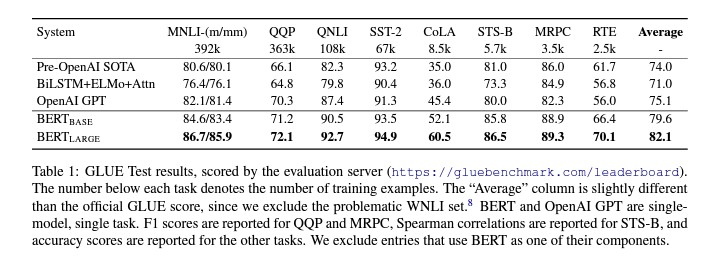

## 4.2 SQuADv1.1
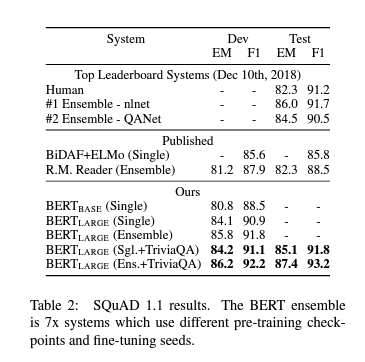

## 4.3 SQuADv2.0
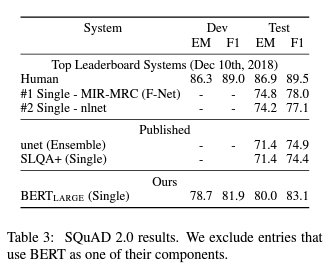

## 4.4 SWAG
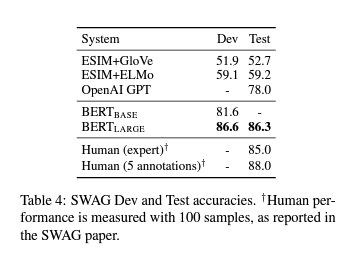

# 6 Conclusion
언어 모델의 transfer learning으로 인한 최근의 경험적 개선은 풍부하고, unsupervised pre-training이 많은 언어 이해 시스템의 필수적인 부분임을 보여주었습니다. 특히 이러한 결과를 통해 리소스가 적은 tasks도 deep unidirectional 아키텍처의 이점을 얻을 수 있습니다. 이 논문의 주요 contribution은 이러한 결과를 deep bidirectional 아키텍처로 일반화하여 동일한 pre-trained 모델이 광범위한 NLP tasks를 성공적으로 처리할 수 있도록 한 것입니다.